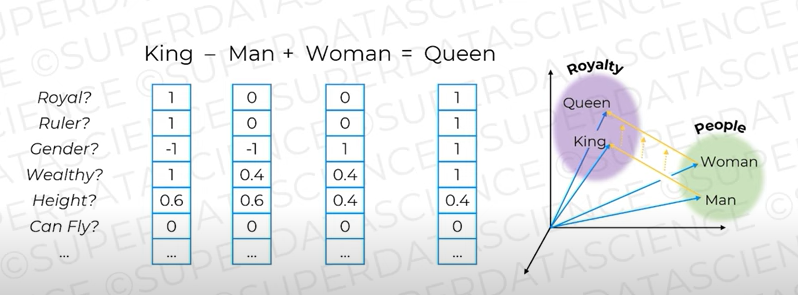

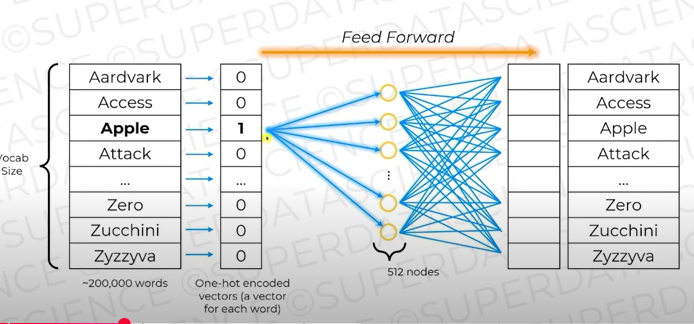

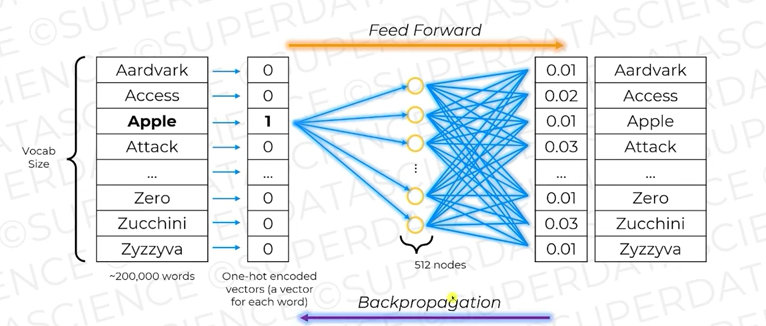

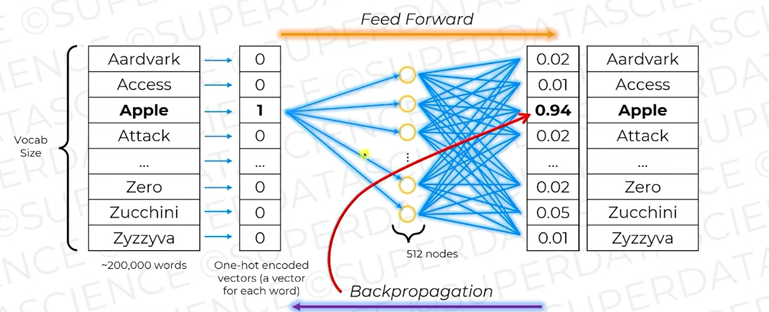

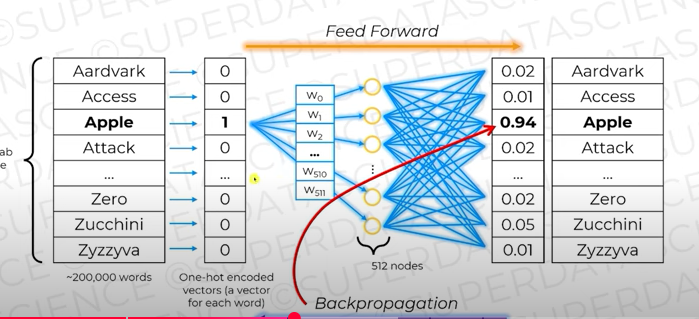

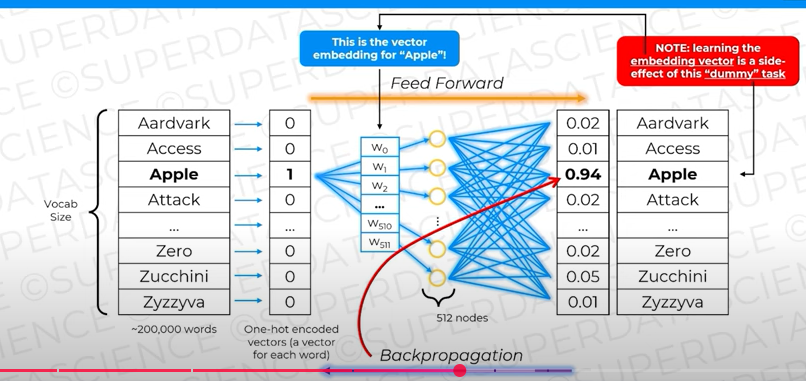

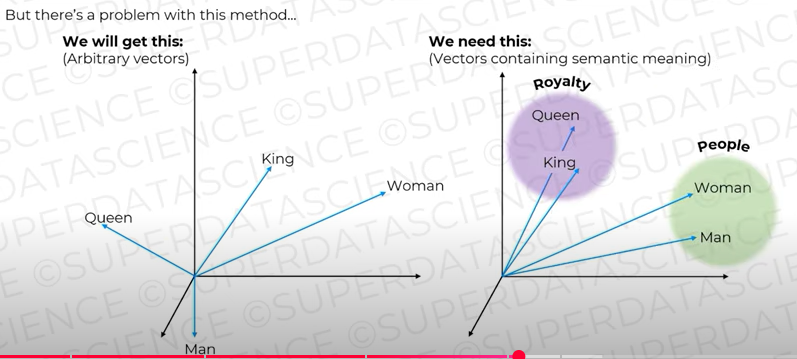

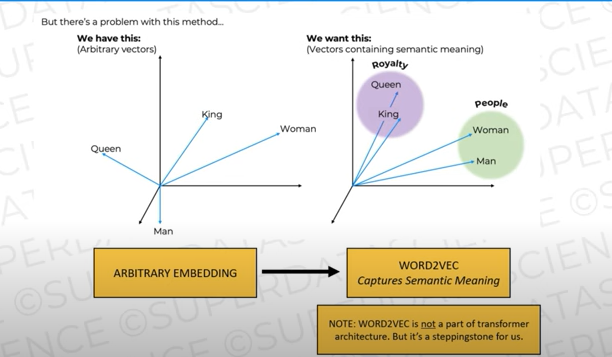

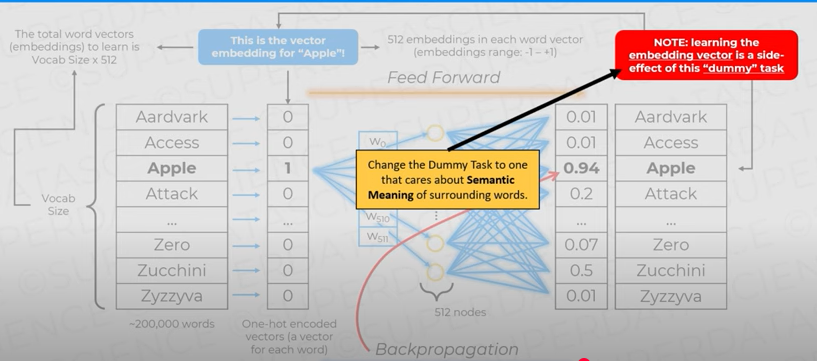

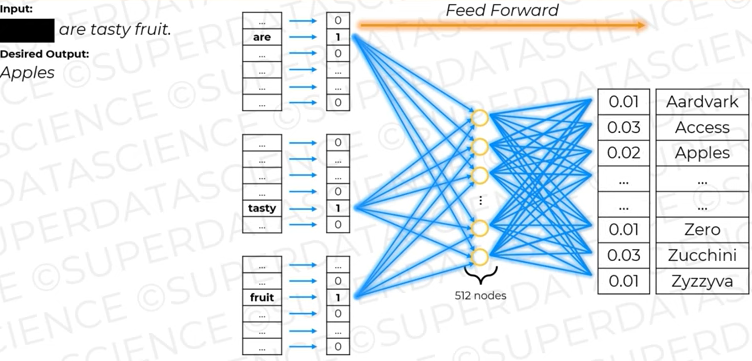

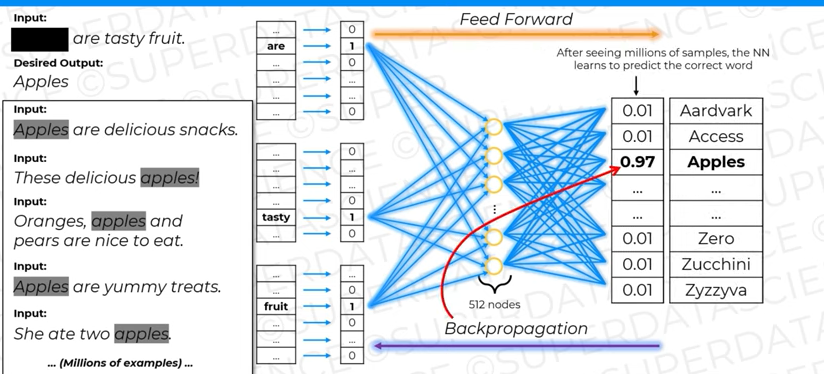

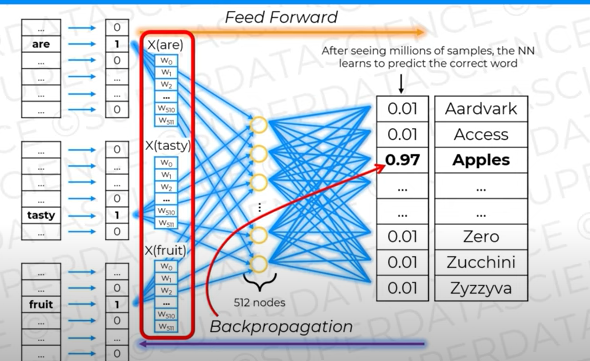

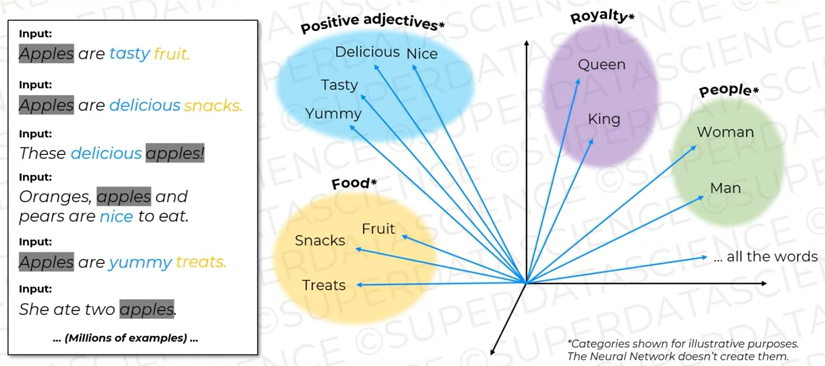

In [39]:
import numpy as np

In [40]:
vocab_size = 3
embedding_dim = 12
output_dim = 3

In [41]:
inputs = np.array([1, 0, 0])
targets = np.array([1, 0, 0])

In [127]:
class EmbeddingLayer:
    def __init__(self, vocab_size,embedding_dim,learning_rate):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.embeddings = np.random.rand(vocab_size, embedding_dim)
        self.learning_rate = learning_rate
        # print("embeddings weights:", self.embeddings)

    def forward(self, inputs):
        outputs = np.dot(self.embeddings.T, inputs)
        return outputs
    
    def backward(self, grad_outputs):
        self.embeddings -= self.learning_rate * grad_outputs
        return self.embeddings
       

In [29]:
layer1 = EmbeddingLayer(3,12)

In [30]:
layer1.embeddings

array([[0.36398369, 0.53127673, 0.6197632 , 0.52875743, 0.89770534,
        0.9925061 , 0.49635019, 0.88317752, 0.49830501, 0.90301172,
        0.45182569, 0.11273131],
       [0.52080037, 0.3829177 , 0.5560165 , 0.76967234, 0.00843567,
        0.50802941, 0.63118774, 0.34599039, 0.81920473, 0.58823479,
        0.69597488, 0.11805193],
       [0.10845336, 0.71248083, 0.80291986, 0.72790378, 0.26086413,
        0.79255993, 0.70600334, 0.31036067, 0.98585853, 0.45335183,
        0.35801281, 0.55774755]])

In [32]:
output1 = layer1.forward(inputs)

In [33]:
output1

array([0.36398369, 0.53127673, 0.6197632 , 0.52875743, 0.89770534,
       0.9925061 , 0.49635019, 0.88317752, 0.49830501, 0.90301172,
       0.45182569, 0.11273131])

In [34]:
layer2 = EmbeddingLayer(12,3)

In [35]:
layer2.embeddings

array([[5.95331837e-01, 6.29973479e-01, 3.42413602e-01],
       [1.91208157e-01, 6.25147562e-01, 3.82156054e-01],
       [1.77905461e-01, 4.24328646e-01, 5.50277997e-01],
       [4.96308544e-01, 1.63723895e-01, 6.67827216e-01],
       [1.44687369e-01, 4.94117640e-01, 1.18879568e-01],
       [6.54663631e-01, 1.47948024e-02, 9.73892825e-02],
       [4.98313072e-01, 9.48396504e-04, 7.92276769e-01],
       [3.83146526e-01, 9.74459857e-01, 2.17953441e-01],
       [5.44473182e-01, 5.42628998e-01, 4.72673564e-01],
       [3.12136038e-01, 7.89385404e-02, 7.50534179e-01],
       [9.04043436e-01, 5.08267991e-01, 9.99233178e-01],
       [8.60267838e-03, 2.74704606e-01, 5.21490576e-01]])

In [36]:
output2 = layer2.forward(output1)

In [37]:
output2

array([3.01894612, 2.8326212 , 3.23448512])

In [55]:
import numpy as np
class SoftmaxLayer():
    def __init__(self,inputs):
        self.inputs = inputs
    def activation(self):
        exps = np.exp(self.inputs)
        sum_exp_x = np.sum(exps, axis=-1, keepdims=True)
        return exps / sum_exp_x
        

In [56]:
vocab_size = 3
embedding_dim = 12
output_dim = 3
inputs = np.array([1, 0, 0]) # [apple, mango, orange]
learning_rate = 0.01

In [126]:
def train(vocab_size , embedding_dim , inputs, learning_rate, epochs):
    layer1 = EmbeddingLayer(vocab_size,embedding_dim,learning_rate)
    layer2 = EmbeddingLayer(embedding_dim,vocab_size, learning_rate)
    
    for epoch in range(epochs):
        output1 = layer1.forward(inputs)
        # print("output1: ", output1)
        output2 = layer2.forward(output1)
        # print("outputs: ", output2)
        softmax_layer = SoftmaxLayer(output2)
        softmax_output = softmax_layer.activation()
        # print("softmax_output: ", softmax_output)
        loss = np.mean((softmax_output - inputs) ** 2)
        # print(f"Loss: {loss:.4f}")
        # print(layer1.embeddings)
        # print(layer2.embeddings)
        print(f'Epoch {epoch+1}, Loss: {loss:.4f}')
        dloss_dsoft = 2 * (softmax_output - inputs)
        dsoft_dout2 = softmax_output * (1 - softmax_output)
        dl_dout2 = np.array(dloss_dsoft * dsoft_dout2)
        dl_dout2 = np.expand_dims(dl_dout2, axis=1)
        # print(dl_dout2.shape)
        # print(dl_dout2)
        dout2_dw2 = output1
        dout2_dw2 = np.expand_dims(dout2_dw2, axis=1)
        # print(dout2_dw2.shape)
        dloss_dw2 = np.dot(dl_dout2,dout2_dw2.T)   # 3x12
        backprop2 = layer2.backward(dloss_dw2.T) # 12x3
        dw2_dout1 = np.ones((1,3))
        dl_dout1 =  np.dot(dw2_dout1,dloss_dw2) # 1x12 = 1x3 * 3x12
        dout1_dw1 = inputs # 3
        dout1_dw1 = np.expand_dims(dout1_dw1, axis=1) # 3x1 
        # print(dout1_dw1.shape)
        dl_dw1 = np.dot(dout1_dw1,dl_dout1) # 3x12
        backprop1 = layer1.backward(dl_dw1)
        
  
   
    return loss , layer1.embeddings, layer2.embeddings 

In [129]:
epochs = 100

In [ ]:
inputs = np.array([1, 0, 0]) # [apple, mango, orange]

In [130]:
embedding = train(vocab_size,embedding_dim, inputs, learning_rate, epochs)

Epoch 1, Loss: 0.1160
Epoch 2, Loss: 0.1139
Epoch 3, Loss: 0.1119
Epoch 4, Loss: 0.1099
Epoch 5, Loss: 0.1079
Epoch 6, Loss: 0.1060
Epoch 7, Loss: 0.1041
Epoch 8, Loss: 0.1023
Epoch 9, Loss: 0.1005
Epoch 10, Loss: 0.0988
Epoch 11, Loss: 0.0970
Epoch 12, Loss: 0.0954
Epoch 13, Loss: 0.0937
Epoch 14, Loss: 0.0921
Epoch 15, Loss: 0.0906
Epoch 16, Loss: 0.0890
Epoch 17, Loss: 0.0876
Epoch 18, Loss: 0.0861
Epoch 19, Loss: 0.0847
Epoch 20, Loss: 0.0833
Epoch 21, Loss: 0.0819
Epoch 22, Loss: 0.0806
Epoch 23, Loss: 0.0793
Epoch 24, Loss: 0.0780
Epoch 25, Loss: 0.0767
Epoch 26, Loss: 0.0755
Epoch 27, Loss: 0.0743
Epoch 28, Loss: 0.0732
Epoch 29, Loss: 0.0720
Epoch 30, Loss: 0.0709
Epoch 31, Loss: 0.0698
Epoch 32, Loss: 0.0687
Epoch 33, Loss: 0.0677
Epoch 34, Loss: 0.0667
Epoch 35, Loss: 0.0657
Epoch 36, Loss: 0.0647
Epoch 37, Loss: 0.0637
Epoch 38, Loss: 0.0628
Epoch 39, Loss: 0.0619
Epoch 40, Loss: 0.0610
Epoch 41, Loss: 0.0601
Epoch 42, Loss: 0.0593
Epoch 43, Loss: 0.0584
Epoch 44, Loss: 0.05

In [133]:
apple_embedding = embedding[1][0] # dimension 12

In [134]:
apple_embedding

array([0.72092264, 0.97416242, 0.63669285, 0.18175968, 0.3780779 ,
       0.50585968, 0.28469551, 0.70874477, 0.55172652, 0.66854252,
       0.78682563, 0.60680855])

In [136]:
inputs = np.array([0, 1, 0]) # [apple, mango, orange]

In [137]:
embedding = train(vocab_size,embedding_dim, inputs, learning_rate, epochs)

Epoch 1, Loss: 0.2917
Epoch 2, Loss: 0.2894
Epoch 3, Loss: 0.2870
Epoch 4, Loss: 0.2846
Epoch 5, Loss: 0.2822
Epoch 6, Loss: 0.2798
Epoch 7, Loss: 0.2774
Epoch 8, Loss: 0.2750
Epoch 9, Loss: 0.2726
Epoch 10, Loss: 0.2702
Epoch 11, Loss: 0.2678
Epoch 12, Loss: 0.2654
Epoch 13, Loss: 0.2630
Epoch 14, Loss: 0.2606
Epoch 15, Loss: 0.2581
Epoch 16, Loss: 0.2557
Epoch 17, Loss: 0.2533
Epoch 18, Loss: 0.2509
Epoch 19, Loss: 0.2485
Epoch 20, Loss: 0.2461
Epoch 21, Loss: 0.2437
Epoch 22, Loss: 0.2412
Epoch 23, Loss: 0.2388
Epoch 24, Loss: 0.2364
Epoch 25, Loss: 0.2340
Epoch 26, Loss: 0.2316
Epoch 27, Loss: 0.2293
Epoch 28, Loss: 0.2269
Epoch 29, Loss: 0.2245
Epoch 30, Loss: 0.2221
Epoch 31, Loss: 0.2197
Epoch 32, Loss: 0.2174
Epoch 33, Loss: 0.2150
Epoch 34, Loss: 0.2127
Epoch 35, Loss: 0.2103
Epoch 36, Loss: 0.2080
Epoch 37, Loss: 0.2057
Epoch 38, Loss: 0.2034
Epoch 39, Loss: 0.2011
Epoch 40, Loss: 0.1988
Epoch 41, Loss: 0.1965
Epoch 42, Loss: 0.1942
Epoch 43, Loss: 0.1920
Epoch 44, Loss: 0.18

In [138]:
mango_embedding = embedding[1][1] # dimension 12

In [139]:
mango_embedding

array([0.66278761, 0.03061064, 0.00713588, 0.1793524 , 0.89716342,
       0.34248639, 0.64619423, 0.96606975, 0.10985735, 0.59324053,
       0.83834606, 0.18629937])